In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
drive.mount('/content/drive')
Drive_path = '/content/drive/MyDrive/CS4248'
os.chdir(Drive_path)
data = pd.read_csv("./Data/ELCo.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Mounted at /content/drive


In [ ]:
# Word Frequency
english_tokens = [nltk.word_tokenize(phrase.lower()) for phrase in data['English']]

# Tokenize Emoji descriptions
emoji_tokens = [translation.split('[EM]') for translation in data['Emoji']]
emoji_tokens = [[token.strip() for token in translation if token] for translation in emoji_tokens]

# Calculate word frequencies in English phrases
english_word_freq = Counter(word for phrase in english_tokens for word in phrase)

# Calculate Emoji description frequencies
emoji_freq = Counter(description for translation in emoji_tokens for description in translation)

In [ ]:
# Perform POS tagging
pos_tagged_phrases = [nltk.pos_tag(tokens) for tokens in english_tokens]
pos_tagged_emojis = [nltk.pos_tag(tokens) for tokens in emoji_tokens]

# Count the frequency of POS tags
pos_tag_freq_phrases = Counter(tag for phrase in pos_tagged_phrases for _, tag in phrase)
pos_tag_freq_emojis = Counter(tag for emoji in pos_tagged_emojis for _, tag in emoji)

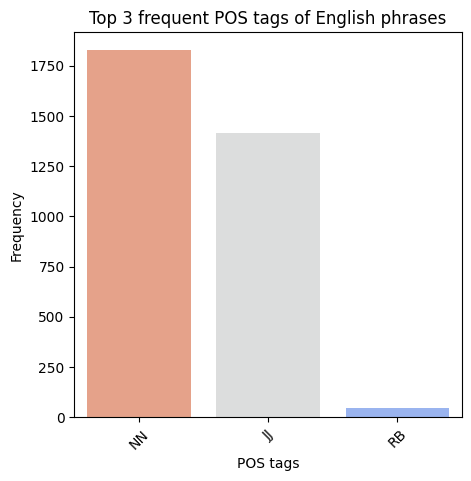

In [ ]:
# Convert word frequencies to a DataFrame and sort by frequency
word_freq_df = pd.DataFrame(list(pos_tag_freq_phrases.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values('Frequency', ascending=False)

# Set the number of top words to display
top_n = 3

# Create a heatmap-style bar plot for word frequency
plt.figure(figsize=(5, 5))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(top_n), palette='coolwarm_r')

# Set plot title and labels
plt.title(f"Top {top_n} frequent POS tags of English phrases")
plt.xlabel("POS tags")
plt.ylabel("Frequency")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

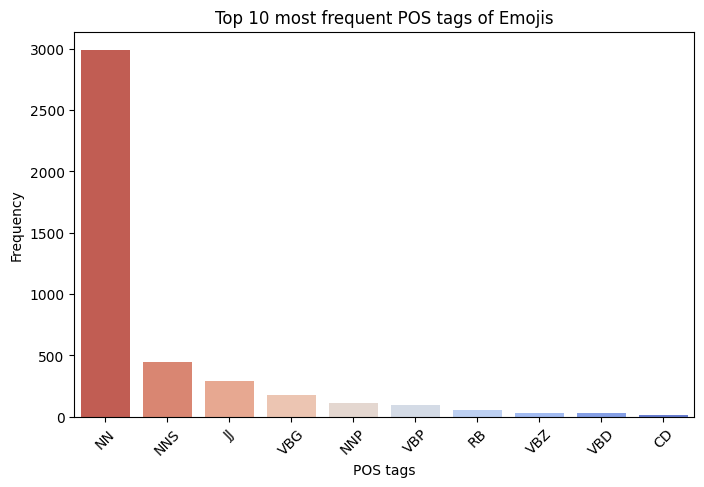

In [ ]:
# Convert word frequencies to a DataFrame and sort by frequency
word_freq_df = pd.DataFrame(list(pos_tag_freq_emojis.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values('Frequency', ascending=False)

# Set the number of top words to display
top_n = 10

# Create a heatmap-style bar plot for word frequency
plt.figure(figsize=(8, 5))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(top_n), palette='coolwarm_r')

# Set plot title and labels
plt.title(f"Top {top_n} most frequent POS tags of Emojis")
plt.xlabel("POS tags")
plt.ylabel("Frequency")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

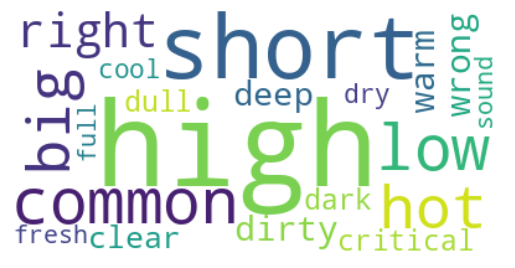

In [ ]:
# Assuming you have a 'Counter' object with word frequencies called 'english_word_freq'

# Create a word cloud
wordcloud = WordCloud(background_color='white', max_words=20).generate_from_frequencies(english_word_freq)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

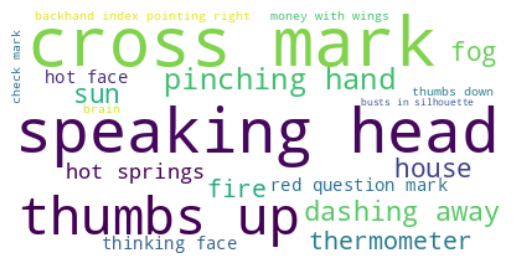

In [ ]:
# Create a word cloud
wordcloud = WordCloud(background_color='white', max_words=20).generate_from_frequencies(emoji_freq)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

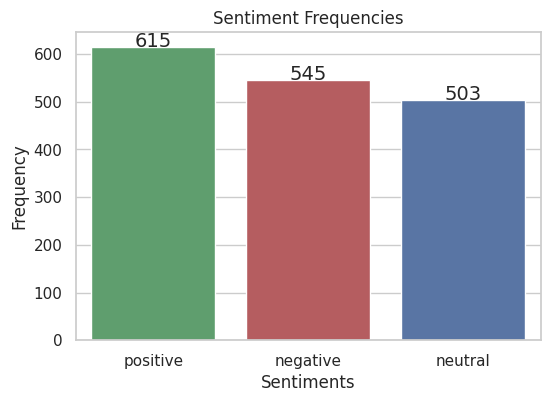

In [ ]:
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        sentiment = "positive"
    elif sentiment_polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment

def count_sentiments(phrases):
    sentiment_counts = {"positive": 0, "negative": 0, "neutral": 0}
    for phrase in phrases:
        sentiment = sentiment_analysis(phrase)
        sentiment_counts[sentiment] += 1
    return sentiment_counts

def plot_sentiment_counts(sentiment_counts):
    sns.set_theme(style="whitegrid")

    sentiments = list(sentiment_counts.keys())
    counts = list(sentiment_counts.values())

    palette = {"positive": "g", "neutral": "b", "negative": "r"}

    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=sentiments, y=counts, palette=palette)
    ax.set(xlabel="Sentiments", ylabel="Frequency", title="Sentiment Frequencies")

    for index, value in enumerate(counts):
        plt.text(index, value + 0.1, str(value), ha="center", fontsize=14)

    plt.show()
sentiment_counts = count_sentiments(data["English"])
plot_sentiment_counts(sentiment_counts)